## C2369C Coursework Final (AY2024 Term 4)

## Student Response
### Name: Wong Qi Yuan, Jeffrey
### Student ID: 2637511F

In [6]:
# import relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam


---

### Part 1. Model Selection and Data Preparation (20 marks) 

##### **Part (a)**

Problem Statement:

Jeff. facility waste management is currently facing a critical challenge of efficiently sorting diverse waste materials like batteries, color glass bottles, cardboard, metal, paper, palstics, and etc. as manual sorting the trashes are laboring and prone to human errors. However, using the automated process like computer vision and deep learning is the only potential solution, but training an authoritative model like Convolutional Neural Network (CNN) from scratch requires large-scaled of labeled image datasets and considerable the amount of training time. As such, this project aims to develop a sustainable approach for trash classification using the modern CNN - Transfer Learning to achieve effective classification with limited labeled datasets and also ultimately improve recycling rates and streamline waste processing. 

The trash image data was sourced from Kaggle website: https://www.kaggle.com/datasets/surabhisathish/finaldata


List of 9 objects to be classify: 
- Class 0: battery
- Class 1: biological
- Class 2: brown-glass
- Class 3: cardboard
- Class 4: green-glass
- Class 5: metal
- Class 6: paper
- Class 7: plastic
- Class 8: white-glass

##### **Part (b) and (c)**

Justification of MobileNetV2:

MobileNetV2 provides a compelling balance between accuracy and computational efficiency which makes it a strong candidate for this trash classification project. As compared to other complex transfer learning models such as ResNet or Inception, MobileNetV2 is a lightweight architecture which utilizes depthwise separable convolutions and inverted residuals that significantly reduces the number of parameters and computation required. This translates to faster inference speeds, crucial for real-time applications, and lower memory footprint. While potentially sacrificing a small degree of top-end accuracy compared to the other complex models, the gains in speed and efficiency makes MobileNetV2 a more practical and sustainable choice for real-world waste management scenario where rapid classification and accessibility are paramount. 

Data Preprocessing and Augmentation:

In [7]:
# define data path for training data, validation data, and test data directory, respectively. 
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

# define parameters
img_height, img_width = 128, 128


In [8]:
# data augmentation for training data
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.1,
                                   rotation_range = 10, 
                                   zoom_range = 0.1, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

# rescaling for validation and testing data
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size = (img_height, img_width), 
                                                    color_mode = "rgb", 
                                                    batch_size = 256, 
                                                    shuffle = True, 
                                                    seed = 42, 
                                                    class_mode = "categorical")

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                target_size = (img_height, img_width), 
                                                color_mode = "rgb", 
                                                batch_size = 256, 
                                                shuffle = True, 
                                                seed = 42, 
                                                class_mode = "categorical")

# create a function to preprocess the test images 
def preprocess_test_images(img_path):
    # resize the image
    img = image.load_img(img_path, target_size = (img_height, img_width))
    # convert image to array
    img_array = image.img_to_array(img)
    # adjust dimension
    img_array = np.expand_dims(img_array, axis = 0)
    # preprocess input
    img_array = preprocess_input(img_array)
    return img, img_array # return image and image array

### selection of randomly 1 test sample for each category ###
# load battery image and image array 
battery_img_path = "data/test/battery/battery31.jpg"
battery_img, battery_img_array = preprocess_test_images(battery_img_path)

# load biological image and image array 
biological_img_path = "data/test/biological/biological154.jpg"
biological_img, biological_img_array = preprocess_test_images(biological_img_path)

# load brown-glass image and image array 
brown_glass_img_path = "data/test/brown-glass/brown-glass516.jpg"
brown_glass_img, brown_glass_img_array = preprocess_test_images(brown_glass_img_path)

# load cardboard image and image array 
cardboard_img_path = "data/test/cardboard/cardboard244.jpg"
cardboard_img, cardboard_img_array = preprocess_test_images(cardboard_img_path)

# load green-glass image and image array 
green_glass_img_path = "data/test/green-glass/green-glass296.jpg"
green_glass_img, green_glass_img_array = preprocess_test_images(green_glass_img_path)

# load metal image and image array 
metal_img_path = "data/test/metal/metal246.jpg"
metal_img, metal_img_array = preprocess_test_images(metal_img_path)

# load paper image and image array 
paper_img_path = "data/test/paper/paper223.jpg"
paper_img, paper_img_array = preprocess_test_images(paper_img_path)

# load plastic image and image array 
plastic_img_path = "data/test/plastic/plastic45.jpg"
plastic_img, plastic_img_array = preprocess_test_images(plastic_img_path)

# load white-glass image and image array 
white_glass_img_path = "data/test/white-glass/white-glass452.jpg"
white_glass_img, white_glass_img_array = preprocess_test_images(white_glass_img_path)

obj_class = ['battery', 'biological', 'brown glass', 'cardboard', 'green glass', 'metal', 'paper', 'plastic', 'white glass']
actual_test_img_list = [battery_img, biological_img, brown_glass_img, cardboard_img, green_glass_img, metal_img, paper_img, plastic_img, white_glass_img]
actual_test_img_array = [battery_img_array, biological_img_array, brown_glass_img_array, cardboard_img_array, green_glass_img_array, metal_img_array, paper_img_array, plastic_img_array, white_glass_img_array]

Found 7308 images belonging to 9 classes.
Found 967 images belonging to 9 classes.


##### **Part (d)**

Load MobileNetV2 and Predictions on the Images from the Test Data (1 for Each Class of Object)

1/1 [==============================] - 0s 20ms/step


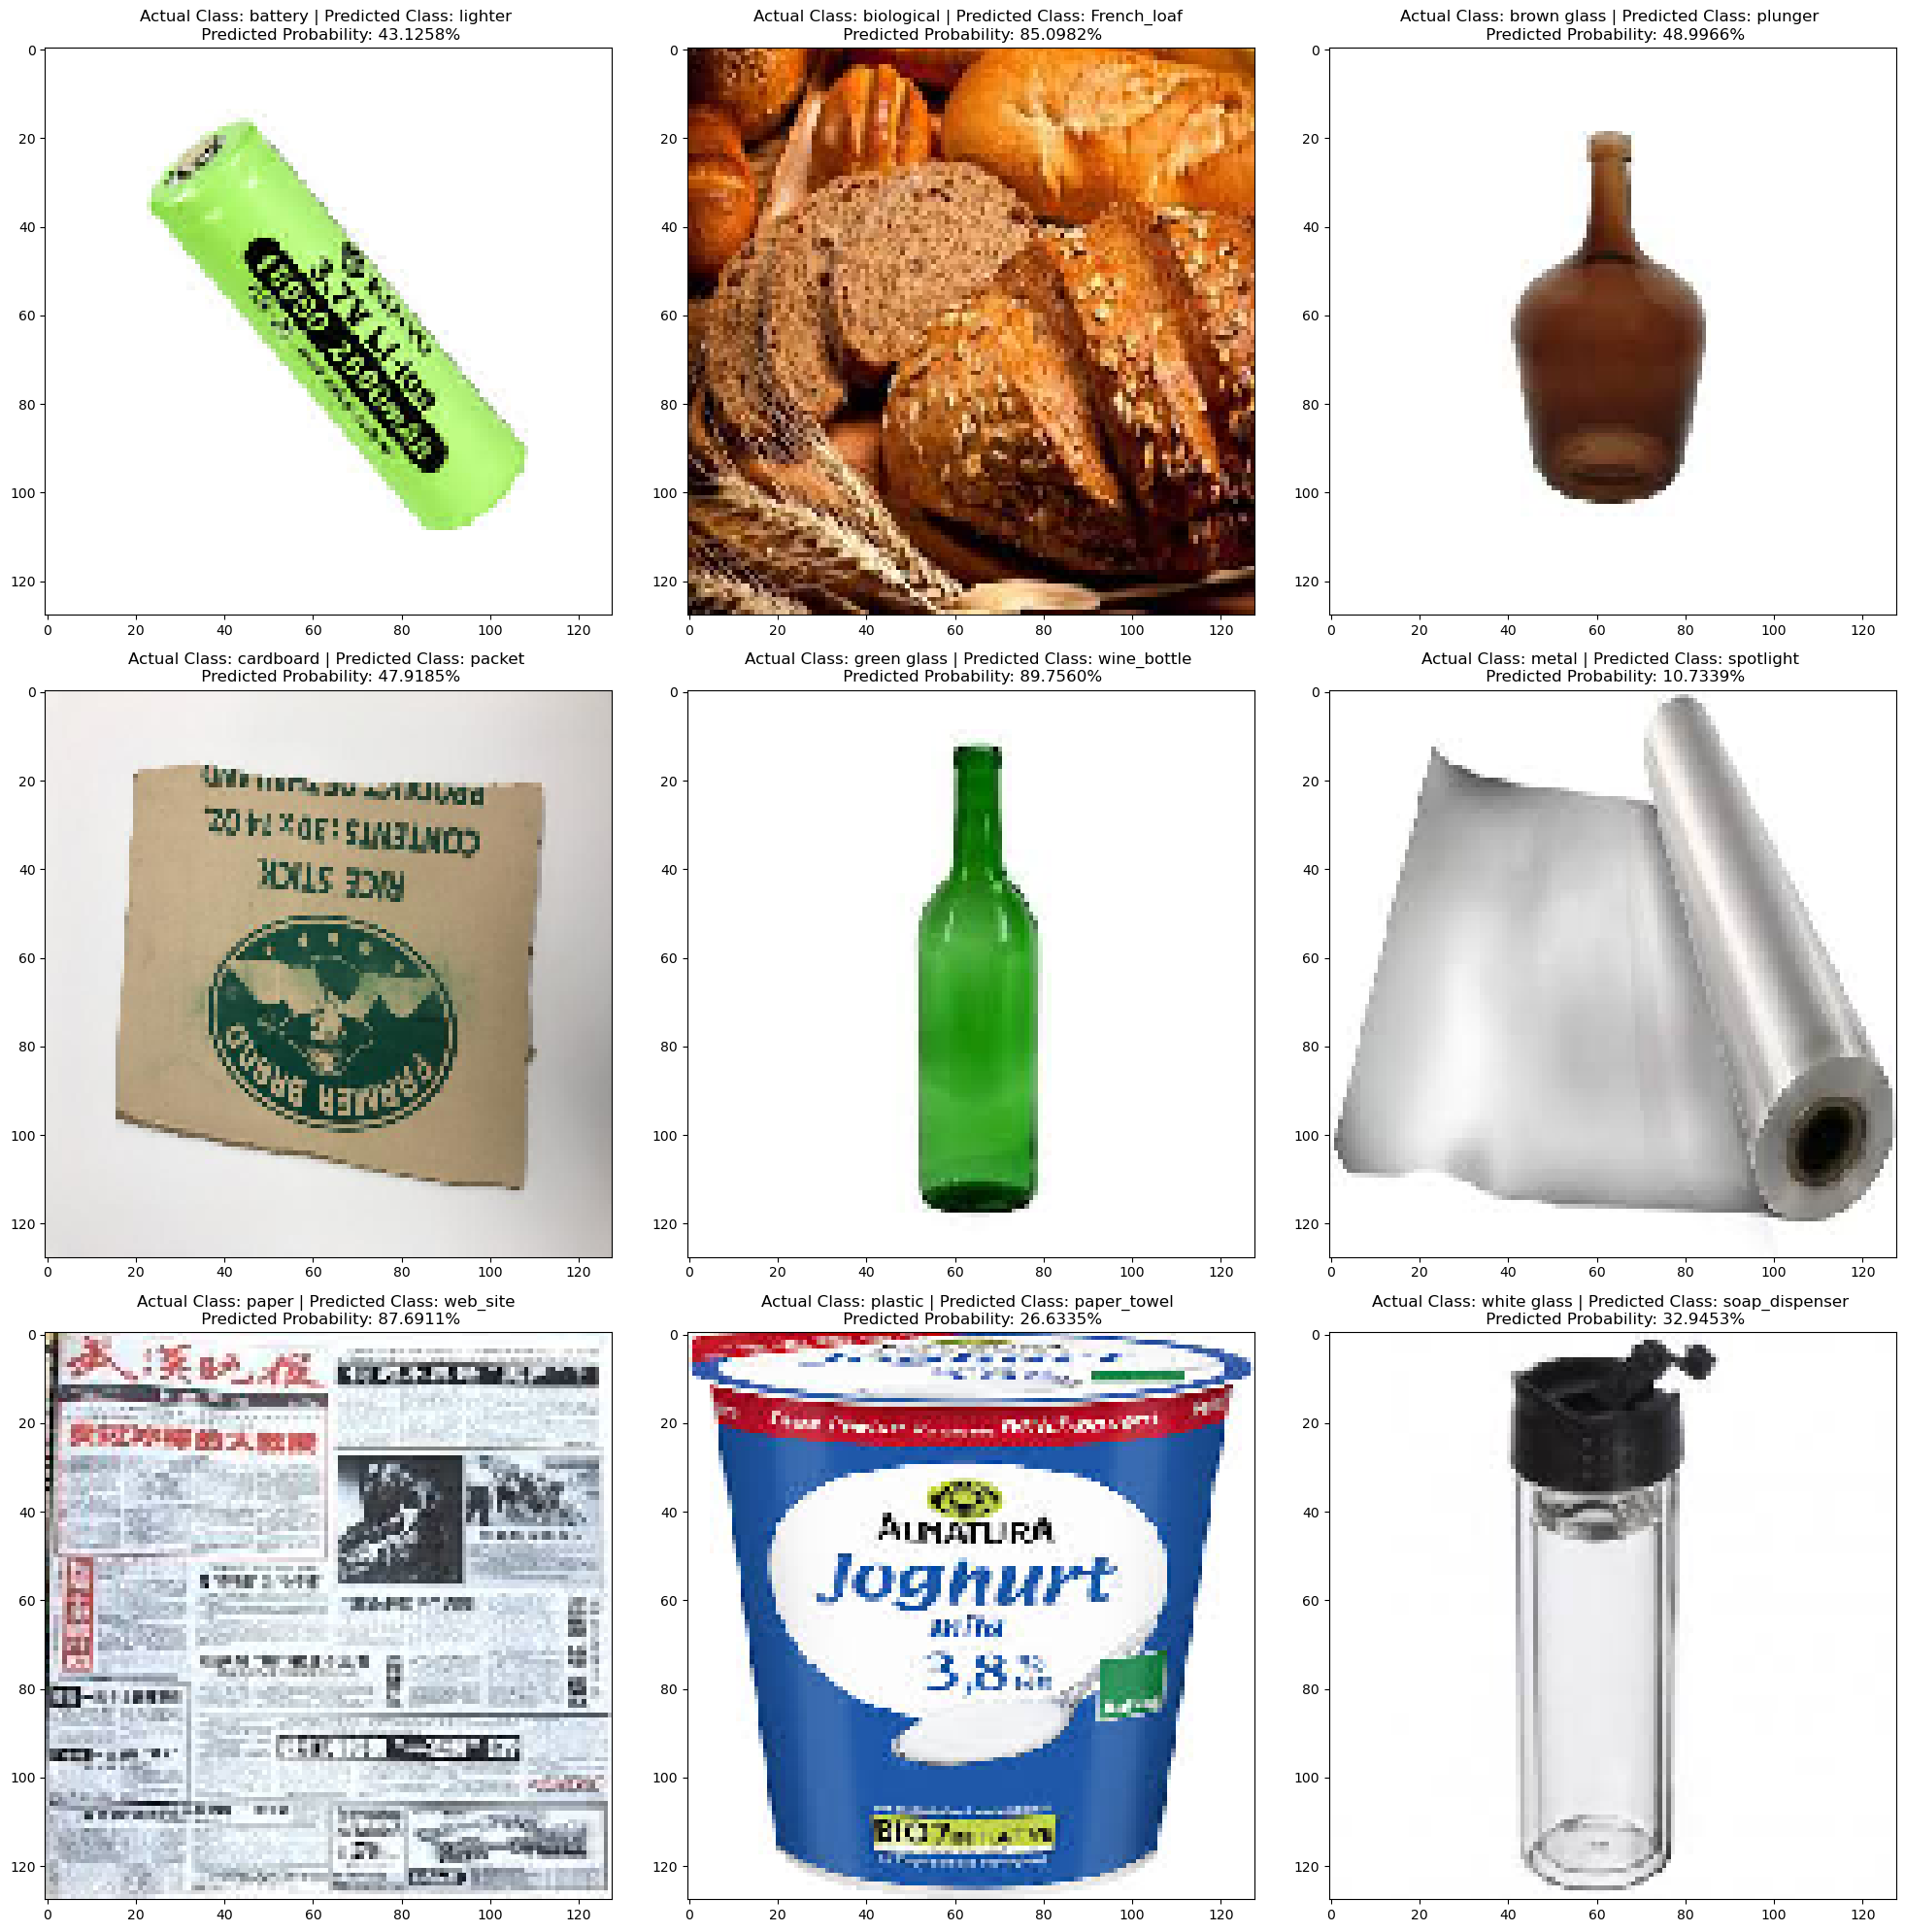

In [9]:
# load the model with pretrained weights
model_mobilenetv2 = MobileNetV2(weights = "imagenet", input_shape = (img_height, img_width, 3))

# create a function to perform prediction on images 
def object_prediction(img_array):
    obj_pred = model_mobilenetv2.predict(img_array)
    obj_decode_pred = decode_predictions(obj_pred)
    return obj_decode_pred[0][0][1], obj_decode_pred[0][0][2] # return predicted class and predicted probability

# initialize an empty predicted class and predicted probability 
pred_class_res = []
pred_proba_res = []

# iterate each test image array in the list (1 for each class of object)
for test_img_array in actual_test_img_array:

    # call the function to perform predictions on images for test data (1 for each class of object)
    predClass, predProba = object_prediction(test_img_array)

    # store the prediction class and probabilities for the current image 
    pred_class_res.append(predClass)
    pred_proba_res.append(predProba)

# display each image object with predicted class and predicted probability (1 for each class of object)
plt.figure(figsize = (20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(actual_test_img_list[i])
    plt.title("Actual Class: {} | Predicted Class: {} \n Predicted Probability: {:.4f}%".format(obj_class[i], pred_class_res[i], pred_proba_res[i]*100))
plt.tight_layout()
plt.show()

---

### Part 2.	Model Transfer-Learning (20 marks)

##### **Part (a)**

Train the MobileNetV2 using the image datasets. Freeze all the convolutional layers and use only 2 hidden layers for the “top” fully connected layers. 

In [10]:
# pre-trained convolutional layers are loaded using the Imagenet weights and include_top = False in order to exclude the fully connected layers
base_model_mobilenetv2 = MobileNetV2(weights = "imagenet", include_top = False, input_shape = (img_height, img_width, 3))

# layers in the convolutional base are switched from trainable into non-trainable 
for layer in base_model_mobilenetv2.layers:
    layer.trainable = False

# create a customized fully-connected layers 
model_mobilenetv2_tf = Sequential()
model_mobilenetv2_tf.add(base_model_mobilenetv2)
model_mobilenetv2_tf.add(Flatten())
model_mobilenetv2_tf.add(Dense(256, activation = "relu")) 
model_mobilenetv2_tf.add(Dropout(0.1)) 
model_mobilenetv2_tf.add(Dense(128, activation = "relu"))
model_mobilenetv2_tf.add(Dropout(0.1))
model_mobilenetv2_tf.add(Dense(9, activation = "softmax"))

# compile the model for training 
model_mobilenetv2_tf.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

# train and validate the model on GPU
with tf.device("/GPU:0"):
    history_mobilenetv2_tf_res = model_mobilenetv2_tf.fit(train_generator, 
                                                          validation_data = val_generator,
                                                          epochs = 10)

Epoch 1/10
29/29 [==============================] - 25s 788ms/step - loss: 16.9399 - accuracy: 0.4670 - val_loss: 4.6004 - val_accuracy: 0.7746
Epoch 2/10
29/29 [==============================] - 22s 742ms/step - loss: 14.3894 - accuracy: 0.5907 - val_loss: 3.9271 - val_accuracy: 0.8242
Epoch 3/10
29/29 [==============================] - 22s 738ms/step - loss: 11.5334 - accuracy: 0.6720 - val_loss: 3.7814 - val_accuracy: 0.8521
Epoch 4/10
29/29 [==============================] - 22s 747ms/step - loss: 9.5977 - accuracy: 0.7317 - val_loss: 4.5857 - val_accuracy: 0.8521
Epoch 5/10
29/29 [==============================] - 23s 780ms/step - loss: 8.0441 - accuracy: 0.7670 - val_loss: 4.2084 - val_accuracy: 0.8707
Epoch 6/10
29/29 [==============================] - 23s 779ms/step - loss: 6.9945 - accuracy: 0.7894 - val_loss: 3.8815 - val_accuracy: 0.8614
Epoch 7/10
29/29 [==============================] - 23s 792ms/step - loss: 6.0011 - accuracy: 0.8101 - val_loss: 3.8604 - val_accuracy: 0.8

##### **Part (b)**

Analysis on model evaluation with accuracy and loss charts.

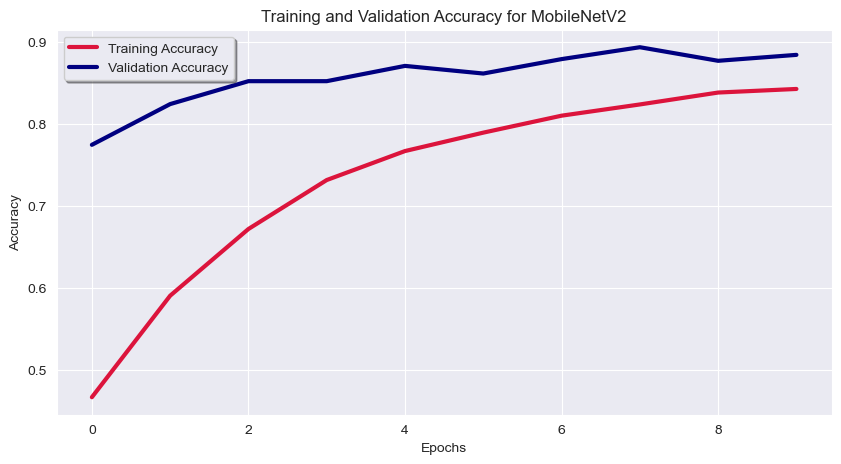

In [11]:
# plot the accuracy curves for both training and validation. 
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.lineplot(history_mobilenetv2_tf_res.history['accuracy'], linewidth = 3, color = "crimson", label = "Training Accuracy")
sns.lineplot(history_mobilenetv2_tf_res.history['val_accuracy'], linewidth = 3, color = "navy", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy for MobileNetV2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(shadow = True)
plt.show()

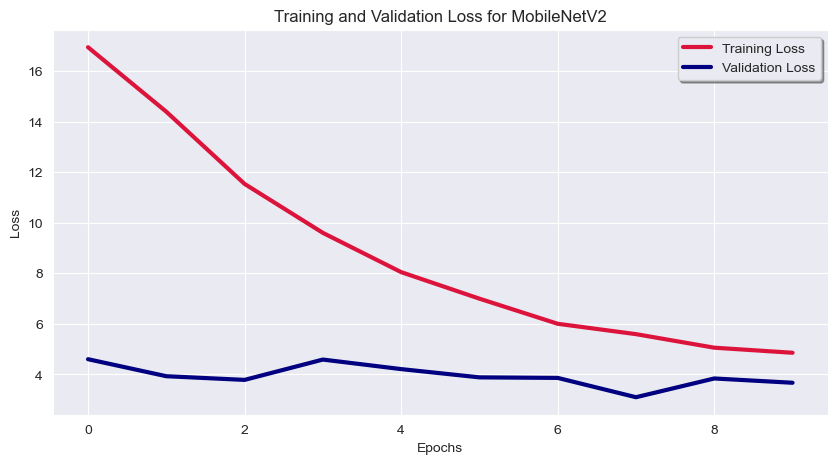

In [12]:
# plot the loss curves for both training and validation. 
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.lineplot(history_mobilenetv2_tf_res.history['loss'], linewidth = 3, color = "crimson", label = "Training Loss")
sns.lineplot(history_mobilenetv2_tf_res.history['val_loss'], linewidth = 3, color = "navy", label = "Validation Loss")
plt.title("Training and Validation Loss for MobileNetV2")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(shadow = True)
plt.show()

##### **Part (c)**

Make predictions on the image samples from the test dataset (1 image per class), clearly showing predicted results vs actual sample values.

1/1 [==============================] - 0s 21ms/step


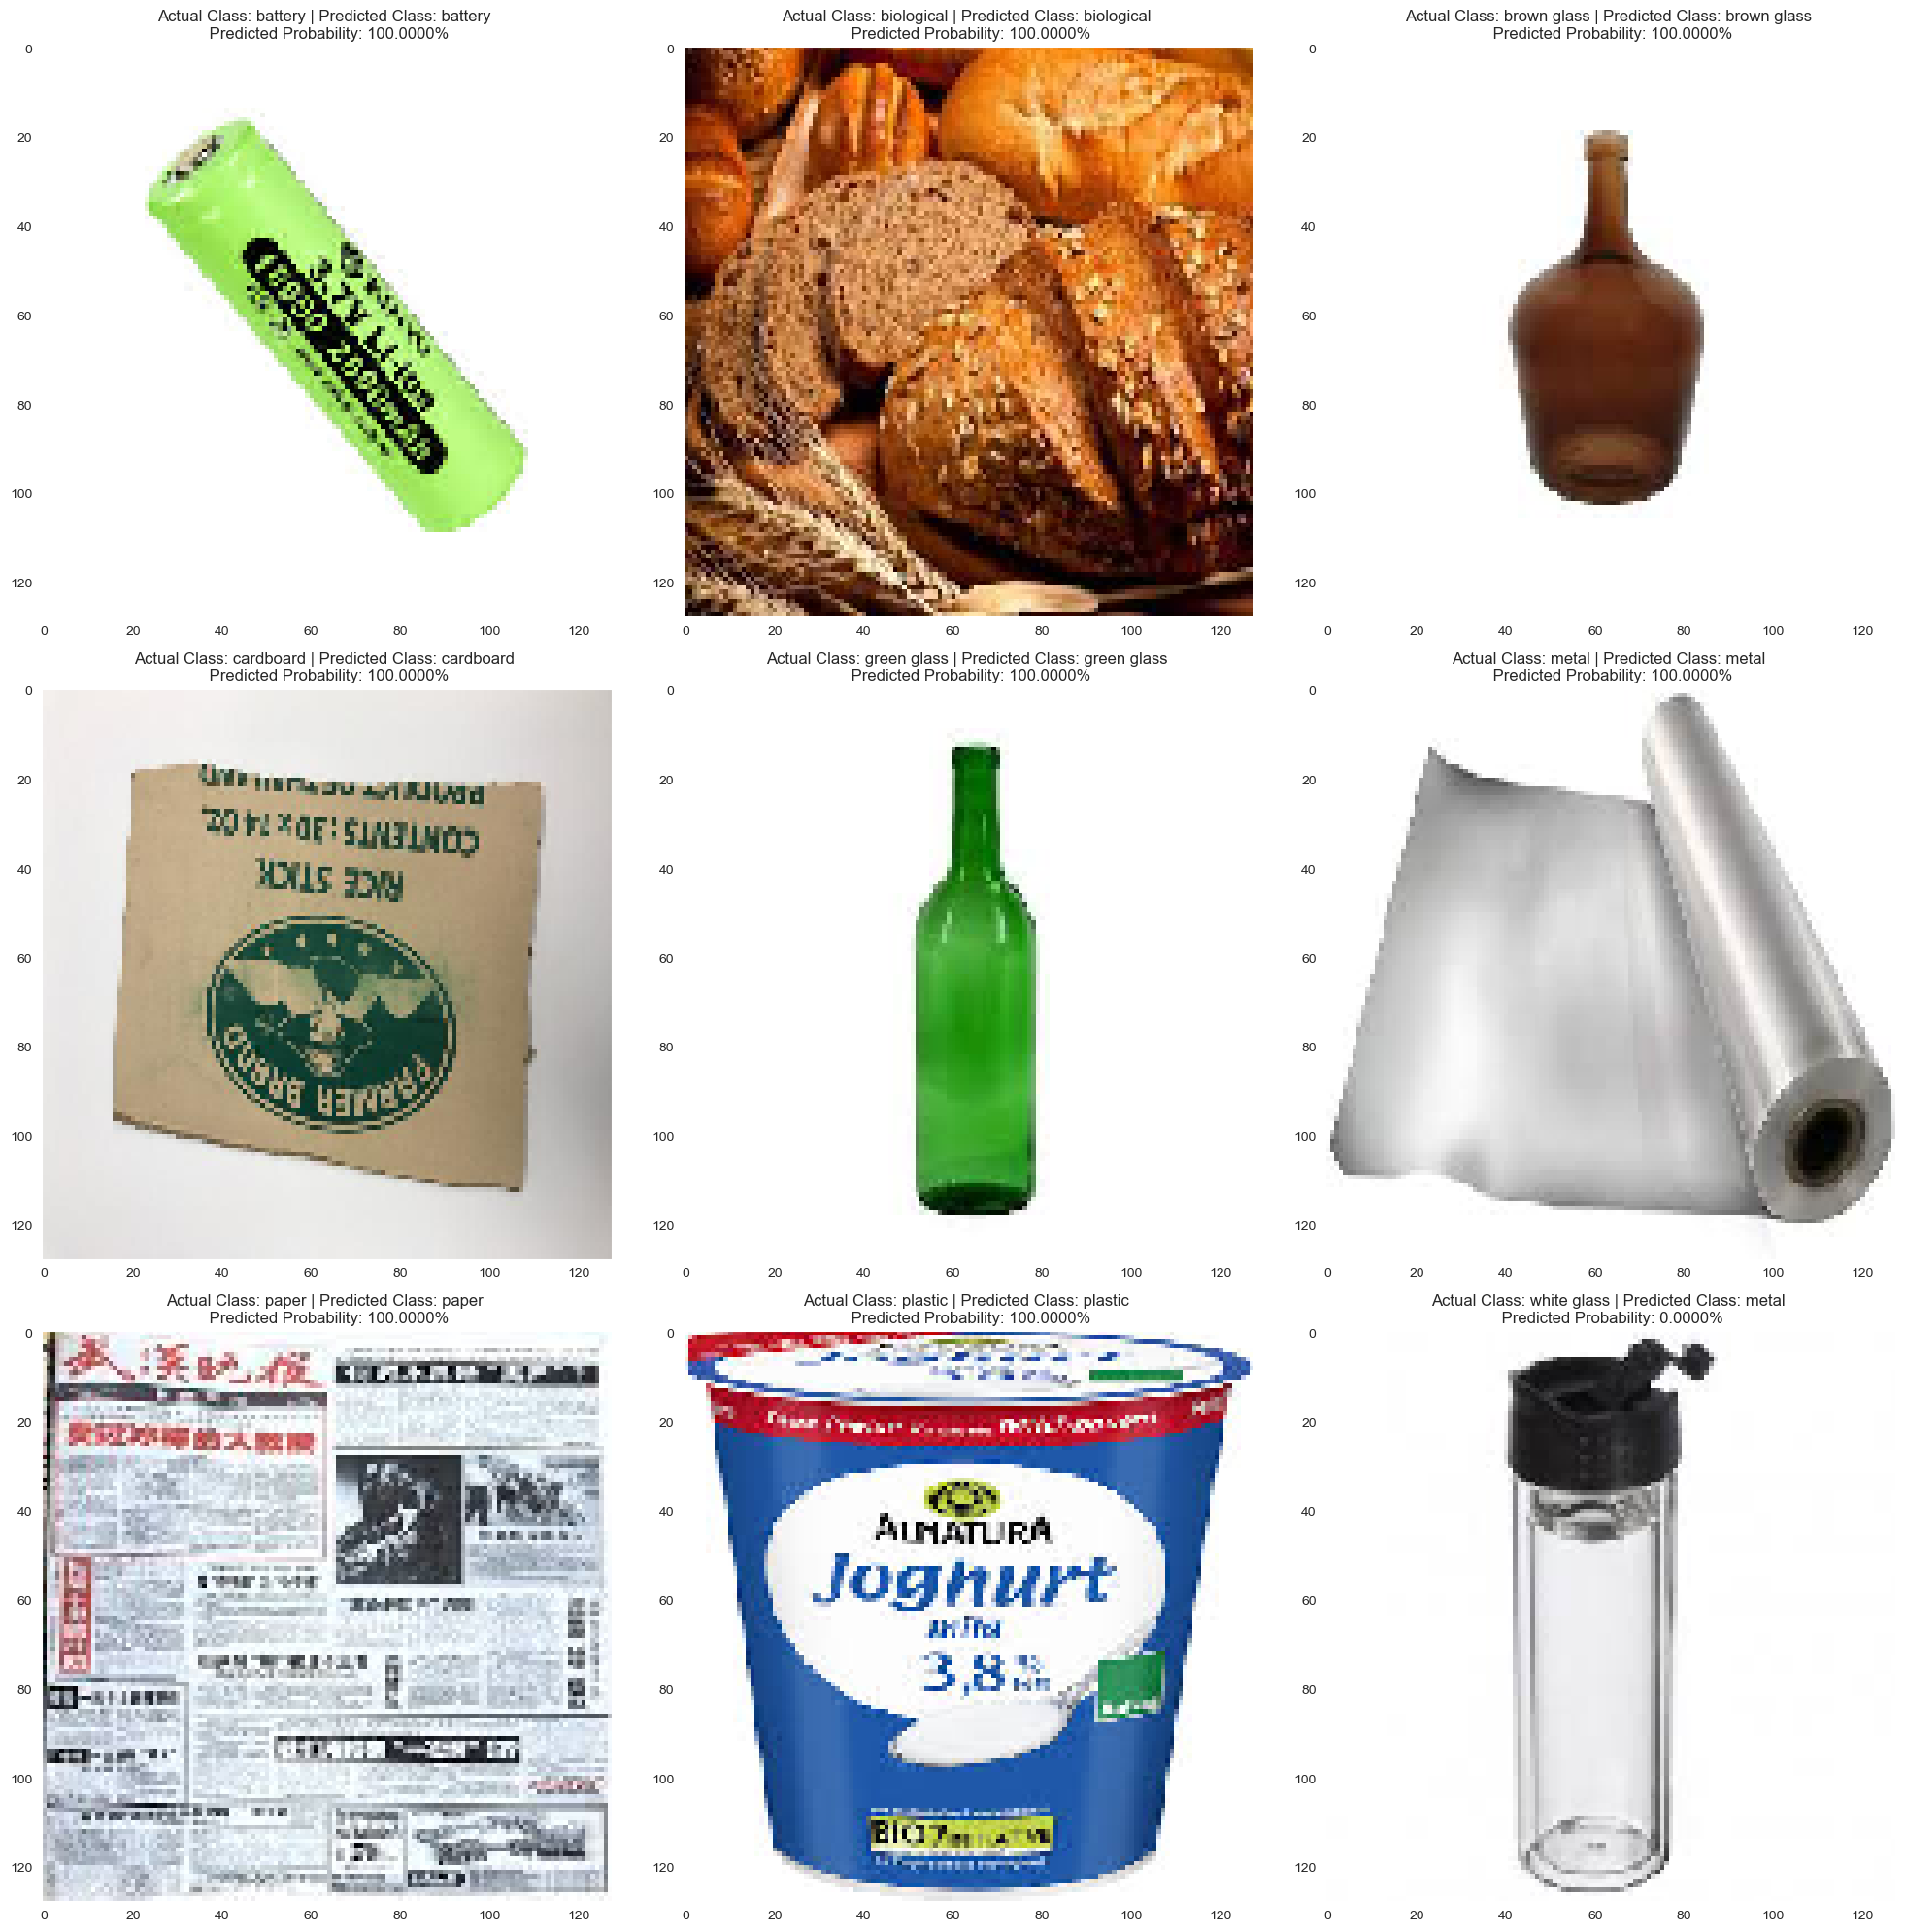

In [13]:
# create a function to perform prediction on images 
def object_prediction_tf(img_array):
    return model_mobilenetv2_tf.predict(img_array) # return a list of predicted probabilities for each class

# initialize an empty predicted class and predicted probability 
pred_class_res_tf = []
pred_proba_res_tf = []

for i in range(len(obj_class)):
    pred_tf_res = object_prediction_tf(actual_test_img_array[i])
    pred_class_res_tf.append(obj_class[np.argmax(pred_tf_res)])
    pred_proba_res_tf.append(pred_tf_res[0][i])

# display each image object with predicted class and predicted probability (1 for each class of object)
plt.figure(figsize = (20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(actual_test_img_list[i])
    plt.title("Actual Class: {} | Predicted Class: {} \n Predicted Probability: {:.4f}%".format(obj_class[i], pred_class_res_tf[i], pred_proba_res_tf[i]*100))
    plt.grid(False)
plt.tight_layout()
plt.show()

---

### Part 3.	Model Fine-Tuning (20 marks).

##### **Part (a) & Part (b)**

##### **Hyperparameter Tuning (Activation Function & Dropout Rate)**

Fine-tuning activation functions and dropout rates is essential for optimizing a neural network's performance. Activation functions like ReLU, SELU, GELU, and ELU impact how the network processes and transforms input data, affecting the learning dynamics and gradient flow. Each function has strengths in different contexts—for instance, GELU and SELU can offer smoother gradients, which help in training deep networks more effectively. Dropout rates control overfitting by randomly deactivating neurons during training, with a moderate dropout rate (0.1 to 0.3) providing a balance between retaining enough network capacity and encouraging generalization. Fine-tuning these parameters helps achieve better convergence and model performance tailored to the specific data and task.

Using a direct for-loop for hyperparameter tuning, rather than relying on GridSearchCV or RandomizedSearchCV, can also be beneficial in situations where flexibility, simplicity, or custom evaluation metrics are required. A direct for-loop allows to implement fine-grained control over the search process such as defining complex search spaces, incorporating domain-specific logic, or avoiding the overhead of cross-validation. It can be more efficient in cases where the parameter grid is small or if there's a need for a non-standard evaluation procedure that grid-based search methods do not support. This approach also reduces the computational cost when the search space is limited or the model training process is fast.

In [ ]:
# duration: 1 hour 
# initialize the best validation accuracy score and best validation loss as zero 
best_val_acc = 0
best_val_loss = float("inf")
best_train_loss = float("inf")

# loop through the combination of parameters to see the impact on model performance and 
# store the highest validation accuracy score and best hyperparameters
for actFunc in ['selu', 'gelu', 'elu', 'relu']:
    for dropoutRate in [0.1, 0.2, 0.3]:
        print("Hyperparameters Tuning: ")
        print("Activation Function: {} \t Dropout Rate: {}".format(actFunc, dropoutRate))

        # pre-trained convolutional layers are loaded using the Imagenet weights and include_top = False in order to exclude the fully connected layers
        base_model_mobilenetv2_ht = MobileNetV2(weights = "imagenet", include_top = False, input_shape = (img_height, img_width, 3))

        # layers in the convolutional base are switched from trainable into non-trainable 
        for layer in base_model_mobilenetv2_ht.layers:
            layer.trainable = False

        # create a customized fully-connected layers 
        model_mobilenetv2_tf_ht = Sequential()
        model_mobilenetv2_tf_ht.add(base_model_mobilenetv2_ht)
        model_mobilenetv2_tf_ht.add(Flatten())
        model_mobilenetv2_tf_ht.add(Dense(256, activation = actFunc)) 
        model_mobilenetv2_tf_ht.add(Dropout(dropoutRate))
        model_mobilenetv2_tf_ht.add(Dense(128, activation = actFunc))
        model_mobilenetv2_tf_ht.add(Dropout(dropoutRate))
        model_mobilenetv2_tf_ht.add(Dense(9, activation = "softmax"))
        
        # compile the model for training 
        model_mobilenetv2_tf_ht.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

        with tf.device("/GPU:0"):
            # train and validate the model on GPU
            history_mobilenetv2_tf_ht_res = model_mobilenetv2_tf_ht.fit(train_generator, 
                                                                    validation_data = val_generator,
                                                                    epochs = 10)
        # display validation accuracy 
        print("Train Loss: {} \t Validation Loss: {} \t Validation Accuracy: {}".format(history_mobilenetv2_tf_ht_res.history['loss'][-1], history_mobilenetv2_tf_ht_res.history['val_loss'][-1], history_mobilenetv2_tf_ht_res.history['val_accuracy'][-1]))
        print()
    
        # training accuracy must not be below the validation accuracy - underfitting 
        if history_mobilenetv2_tf_ht_res.history['accuracy'][-1] >= history_mobilenetv2_tf_ht_res.history['val_accuracy'][-1]:
            if history_mobilenetv2_tf_ht_res.history['val_accuracy'][-1] > best_val_acc and \
                history_mobilenetv2_tf_ht_res.history['val_loss'][-1] < best_val_loss and \
                    history_mobilenetv2_tf_ht_res.history['loss'][-1] < best_train_loss:
                # update the best training loss if it is lowest encountered
                best_train_loss = history_mobilenetv2_tf_ht_res.history['loss'][-1]
                # update the best validation loss if it is lowest encountered
                best_val_loss = history_mobilenetv2_tf_ht_res.history['val_loss'][-1]
                # update the best validation accuracy if it is highest encountered 
                best_val_acc = history_mobilenetv2_tf_ht_res.history['val_accuracy'][-1]
                # update the best hyperparameters 
                best_params = {"activation_function": actFunc, 
                                "dropout_rate": dropoutRate}

Hyperparameters Tuning: 
Activation Function: selu 	 Dropout Rate: 0.1
Epoch 1/10
29/29 [==============================] - 24s 769ms/step - loss: 3.4926 - accuracy: 0.5722 - val_loss: 0.6288 - val_accuracy: 0.8190
Epoch 2/10
29/29 [==============================] - 23s 790ms/step - loss: 0.6866 - accuracy: 0.7963 - val_loss: 0.4077 - val_accuracy: 0.8697
Epoch 3/10
29/29 [==============================] - 24s 801ms/step - loss: 0.4654 - accuracy: 0.8470 - val_loss: 0.3965 - val_accuracy: 0.8718
Epoch 4/10
29/29 [==============================] - 24s 815ms/step - loss: 0.3617 - accuracy: 0.8801 - val_loss: 0.3590 - val_accuracy: 0.8800
Epoch 5/10
29/29 [==============================] - 24s 812ms/step - loss: 0.3049 - accuracy: 0.8972 - val_loss: 0.3463 - val_accuracy: 0.9007
Epoch 6/10
29/29 [==============================] - 24s 821ms/step - loss: 0.2527 - accuracy: 0.9158 - val_loss: 0.3132 - val_accuracy: 0.9007
Epoch 7/10
29/29 [==============================] - 25s 833ms/step - lo

In [ ]:
# display the best score and best hyperparameters
print("The best train loss for hyperparameters: {}".format(best_train_loss))
print("The best validation loss for hyperparameters: {}".format(best_val_loss))
print("The best validation accuracy score for hyperparameters: {}".format(best_val_acc))
print("The best hyperparameters: {}".format(best_params))

The best train loss for hyperparameters: 0.12586776912212372
The best validation loss for hyperparameters: 0.2810611426830292
The best validation accuracy score for hyperparameters: 0.9286453127861023
The best hyperparameters: {'activation_function': 'elu', 'dropout_rate': 0.1}


I retrained the model using the best hyperparameters because the previous tuning process involved training multiple models with different parameter combinations, but each model was trained only once. By using the best hyperparameter settings, I can confirm the robustness of the chosen hyperparameters.

In [15]:
# retrained the transfer learning model using the best hyperparameters
# pre-trained convolutional layers are loaded using the Imagenet weights and include_top = False in order to exclude the fully connected layers
base_model_mobilenetv2_ht1 = MobileNetV2(weights = "imagenet", include_top = False, input_shape = (img_height, img_width, 3))

# layers in the convolutional base are switched from trainable into non-trainable 
for layer in base_model_mobilenetv2_ht1.layers:
    layer.trainable = False

# create a customized fully-connected layers 
model_mobilenetv2_tf_ht1 = Sequential()
model_mobilenetv2_tf_ht1.add(base_model_mobilenetv2_ht1)
model_mobilenetv2_tf_ht1.add(Flatten())
model_mobilenetv2_tf_ht1.add(Dense(256, activation = "elu")) 
model_mobilenetv2_tf_ht1.add(Dropout(0.1))
model_mobilenetv2_tf_ht1.add(Dense(128, activation = "elu"))
model_mobilenetv2_tf_ht1.add(Dropout(0.1))
model_mobilenetv2_tf_ht1.add(Dense(9, activation = "softmax"))

# compile the model for training 
model_mobilenetv2_tf_ht1.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])

with tf.device("/GPU:0"):
    # train and validate the model on GPU
    history_mobilenetv2_tf_ht1_res = model_mobilenetv2_tf_ht1.fit(train_generator, 
                                                            validation_data = val_generator,
                                                            epochs = 10)

Epoch 1/10
29/29 [==============================] - 26s 842ms/step - loss: 3.1329 - accuracy: 0.5148 - val_loss: 0.6456 - val_accuracy: 0.7932
Epoch 2/10
29/29 [==============================] - 22s 748ms/step - loss: 0.6918 - accuracy: 0.7841 - val_loss: 0.4298 - val_accuracy: 0.8542
Epoch 3/10
29/29 [==============================] - 22s 732ms/step - loss: 0.4575 - accuracy: 0.8456 - val_loss: 0.3704 - val_accuracy: 0.8842
Epoch 4/10
29/29 [==============================] - 22s 730ms/step - loss: 0.3528 - accuracy: 0.8804 - val_loss: 0.3616 - val_accuracy: 0.8821
Epoch 5/10
29/29 [==============================] - 23s 791ms/step - loss: 0.2737 - accuracy: 0.9098 - val_loss: 0.3401 - val_accuracy: 0.8862
Epoch 6/10
29/29 [==============================] - 22s 752ms/step - loss: 0.2401 - accuracy: 0.9206 - val_loss: 0.3325 - val_accuracy: 0.8935
Epoch 7/10
29/29 [==============================] - 24s 816ms/step - loss: 0.1961 - accuracy: 0.9335 - val_loss: 0.3384 - val_accuracy: 0.9007

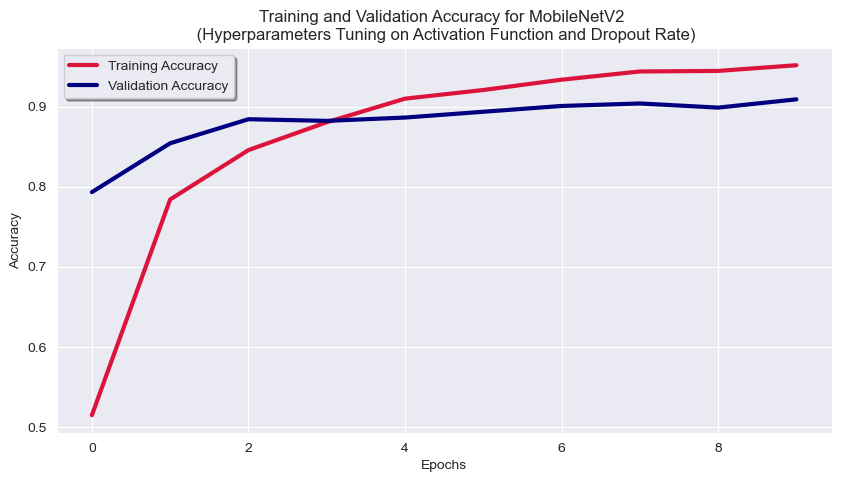

In [16]:
# plot the accuracy curves for both training and validation. 
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.lineplot(history_mobilenetv2_tf_ht1_res.history['accuracy'], linewidth = 3, color = "crimson", label = "Training Accuracy")
sns.lineplot(history_mobilenetv2_tf_ht1_res.history['val_accuracy'], linewidth = 3, color = "navy", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy for MobileNetV2 \n (Hyperparameters Tuning on Activation Function and Dropout Rate)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(shadow = True)
plt.show()

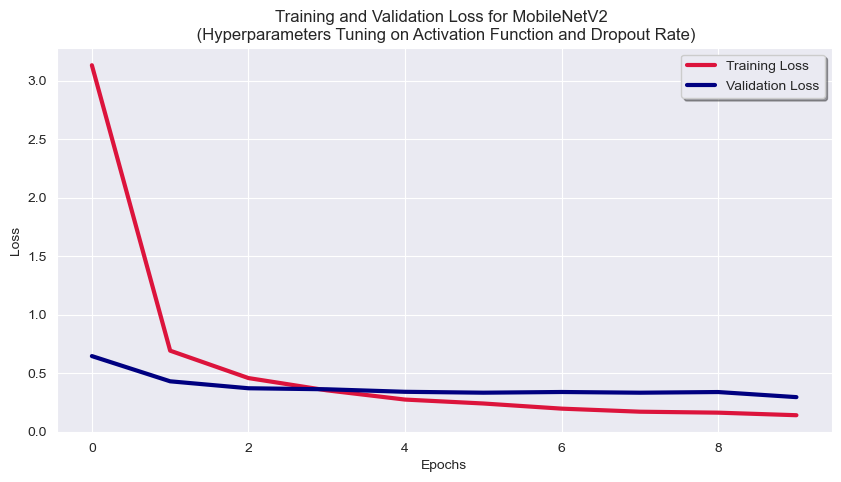

In [17]:
# plot the loss curves for both training and validation. 
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.lineplot(history_mobilenetv2_tf_ht1_res.history['loss'], linewidth = 3, color = "crimson", label = "Training Loss")
sns.lineplot(history_mobilenetv2_tf_ht1_res.history['val_loss'], linewidth = 3, color = "navy", label = "Validation Loss")
plt.title("Training and Validation Loss for MobileNetV2 \n (Hyperparameters Tuning on Activation Function and Dropout Rate)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(shadow = True)
plt.show()

From both accuracy and loss curves, there is no clear sign of overfitting in the training process. The new model's accuracy and loss continue to improve on both the training and validation sets across the 10 epochs. While the validation loss fluctuates slightly, the overall trend in both training and validation metrics suggests that the model is generalizing well. If overfitting were present, you would typically observe a growing gap between training and validation accuracy, with the training accuracy improving while the validation accuracy stagnates or decreases.

1/1 [==============================] - 0s 32ms/step


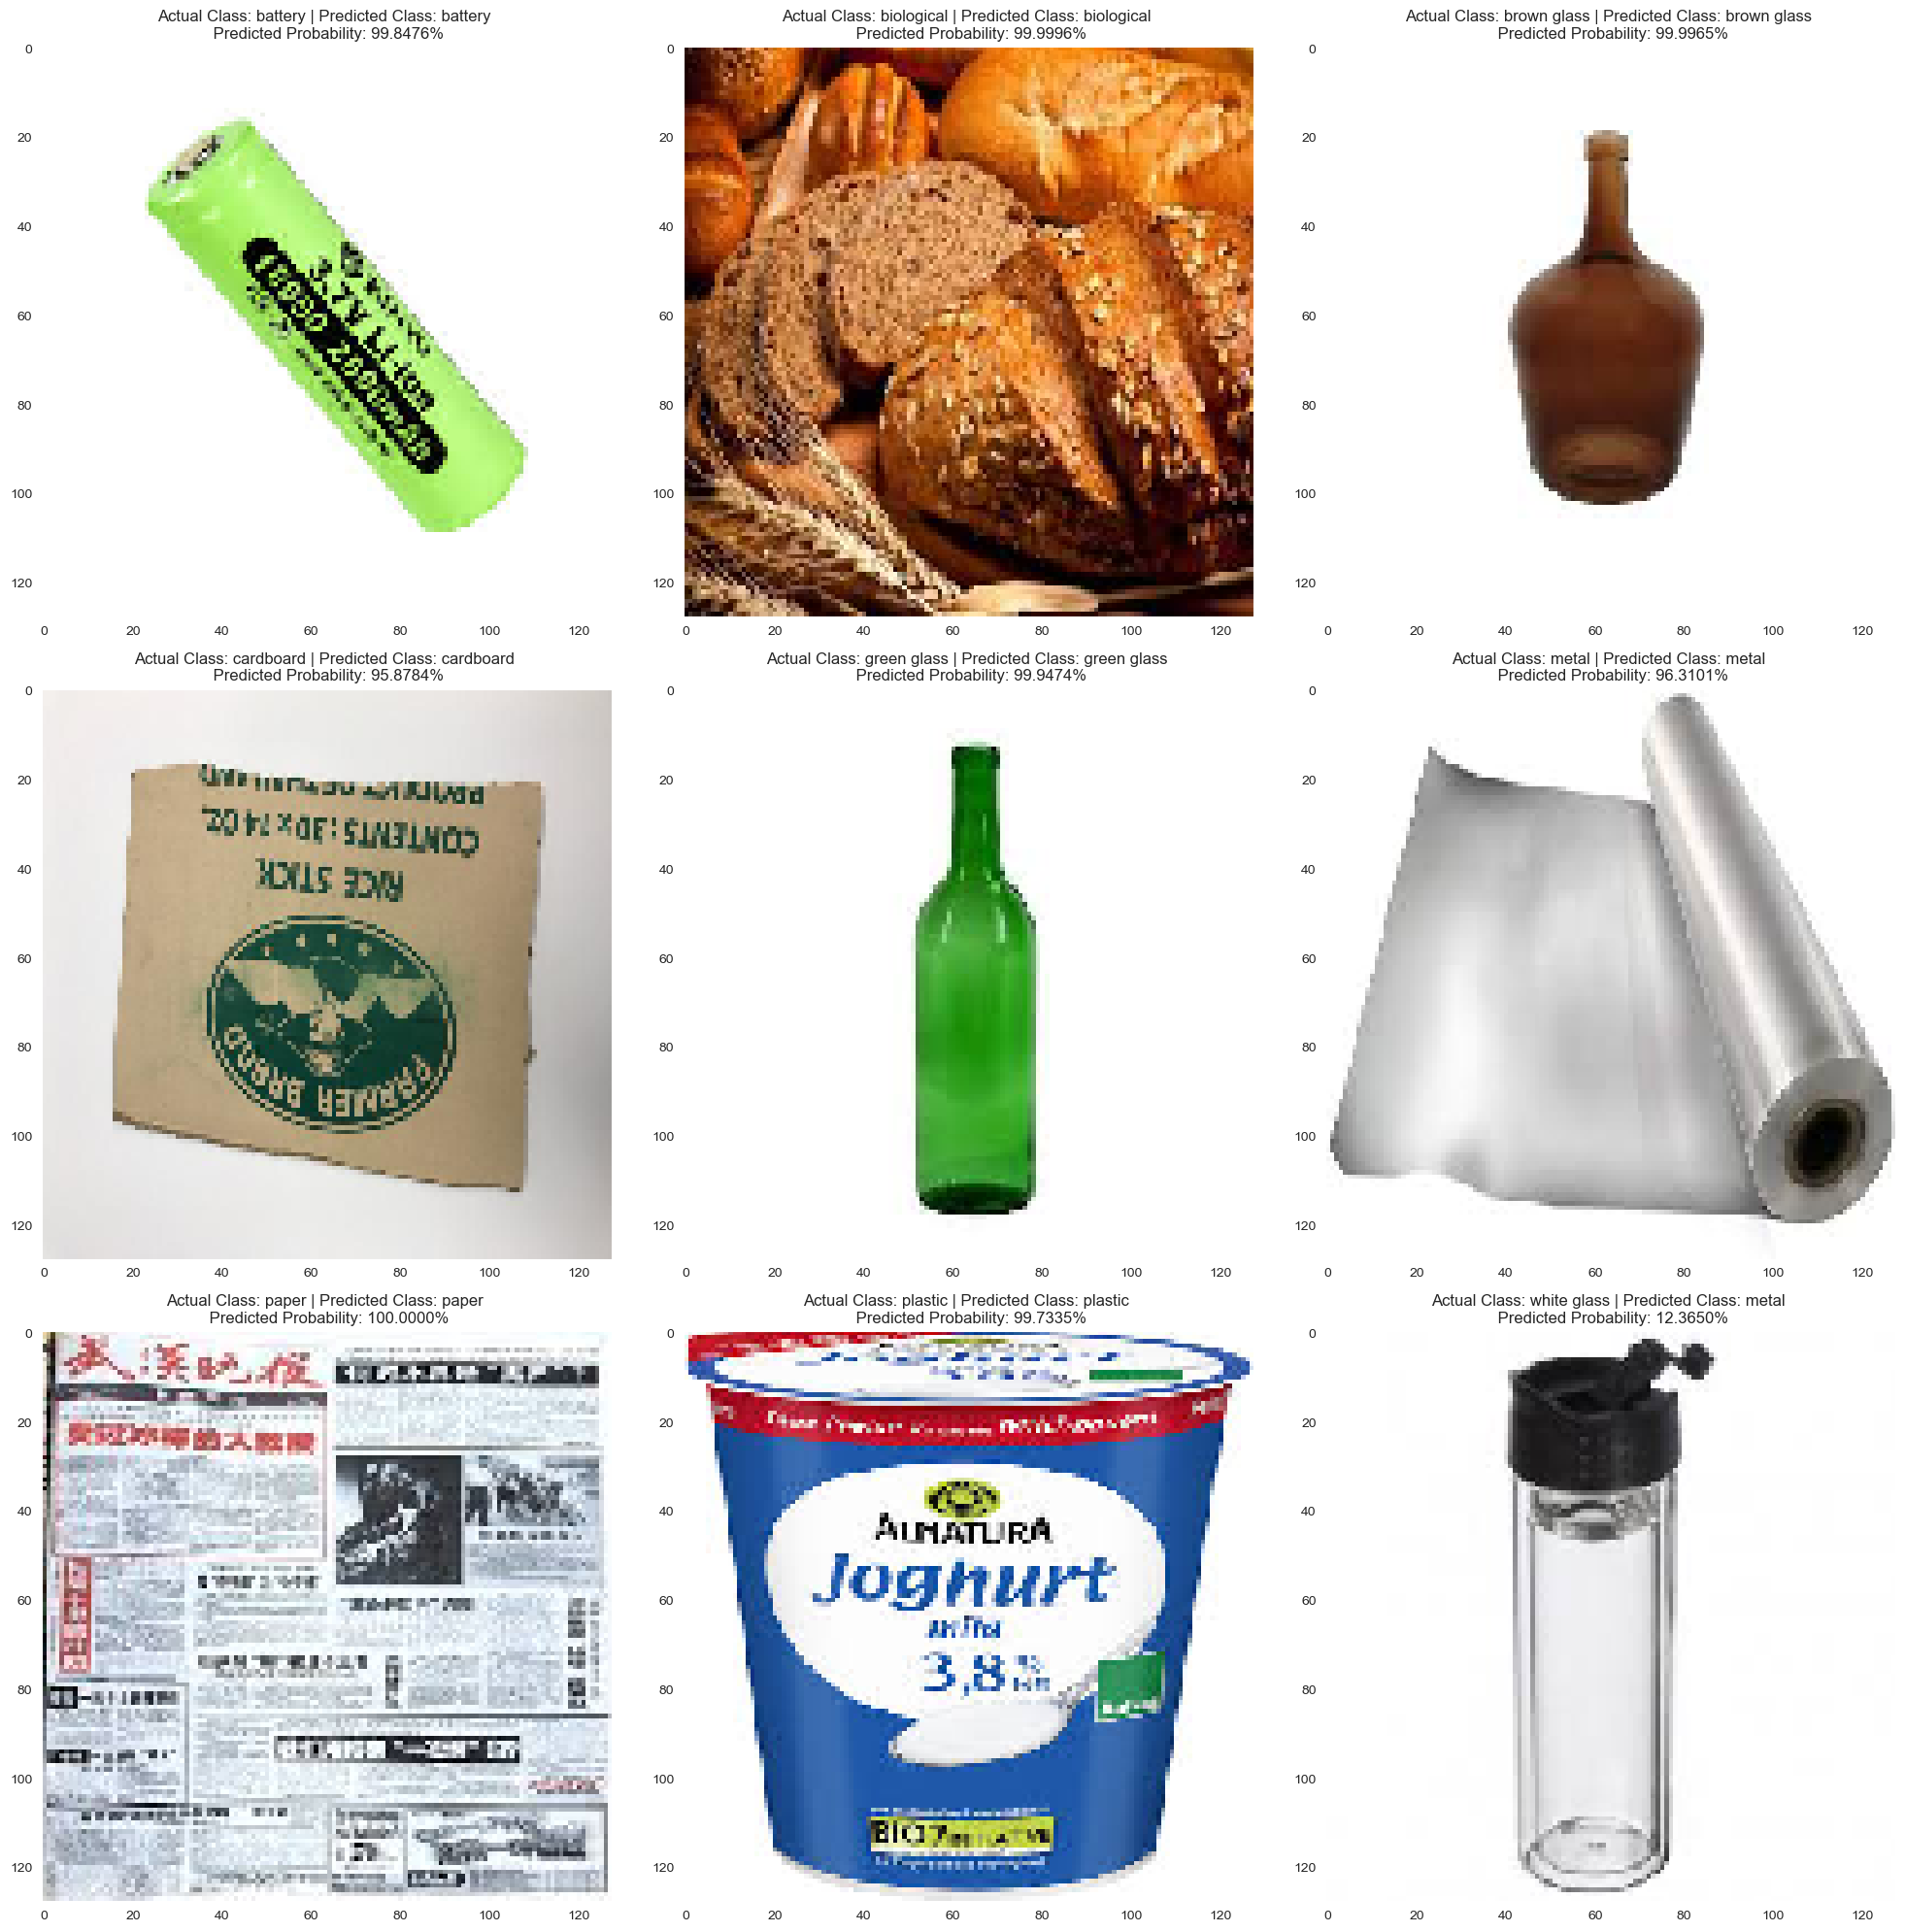

In [18]:
# create a function to perform prediction on images 
def object_prediction_tf(img_array):
    return model_mobilenetv2_tf_ht1.predict(img_array) # return a list of predicted probabilities for each class

# initialize an empty predicted class and predicted probability 
pred_class_res_tf = []
pred_proba_res_tf = []

for i in range(len(obj_class)):
    pred_tf_res = object_prediction_tf(actual_test_img_array[i])
    pred_class_res_tf.append(obj_class[np.argmax(pred_tf_res)])
    pred_proba_res_tf.append(pred_tf_res[0][i])

# display each image object with predicted class and predicted probability (1 for each class of object)
plt.figure(figsize = (20, 20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(actual_test_img_list[i])
    plt.title("Actual Class: {} | Predicted Class: {} \n Predicted Probability: {:.4f}%".format(obj_class[i], pred_class_res_tf[i], pred_proba_res_tf[i]*100))
    plt.grid(False)
plt.tight_layout()
plt.show()

##### **Part (c)**

Discussion on whether it has or has not improved after hyperparameter tuning.

The results show that both hyperparameter tuning have improved the model performance compared to the initial training in Part 2. Before tuning, the model exhibited a large gap between the training and validation loss and accuracy which indicates the potential overfitting and instability. After hyperparameter tuning, the model acheived better validation accuracy and lower validation loss which suggests improved generalization.

##### **Part (d)**

Improve uptrained MobileNetV2 to achieve more than 90% validation accuracy

Using the same codes and results for the hyperparameter tuning in part (a) and (b). 

After hyperparameter tuning, the validation accuracy increased to above 90% which confirms that adjusting activation functions and dropout rates contributed to better generalization. 

Since both tuning processes resulted in accuracy exceeding 90%, the objective for this question is met. 